In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import umap
import warnings
warnings.filterwarnings("ignore")

In [0]:
#load data
mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

In [3]:
#select 10000 images at random

np.random.seed(123)
indices = np.random.choice(70000,10000)
X = mnist.data[indices] / 255.0
y = mnist.target[indices]

print(X.shape, y.shape)

(10000, 784) (10000,)


Apply UMAP to the data.

In [0]:
#use same parameters as in the module
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

Using the two-dimensional UMAP representation, draw a graph of the data by coloring and labeling the data points as we did in the checkpoint.

In [5]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], y[i],
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Do you think UMAP solution is satisfactory? Can you distinguish between different classes easily? Which one has done a better job: UMAP or the others (t-SNE or PCA) that you applied in the assignments of the previous checkpoints?

 I want to check out a map without different colors to see how easily I can distinguish between the classes.

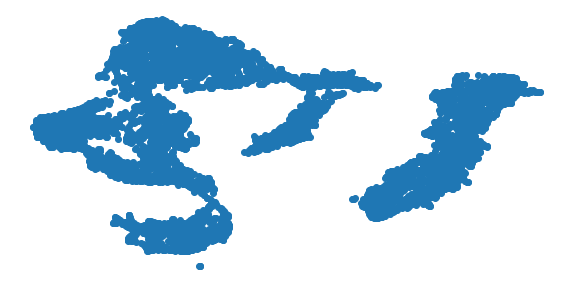

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

The classes are certainly more separate in the UMAP graphic in comparison to the PCA and t-SNE ones, which makes the classes more distinguishable. 

Now, play with the different hyperparameter values of the UMAP and apply UMAP for each of them. Which combination is the best in terms of the two-dimensional representation clarity?

In [0]:
#start by lowering the number of neighbors
umap_results = umap.UMAP(n_neighbors=4,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

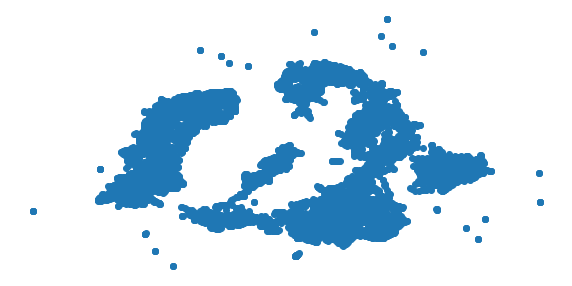

In [8]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Several outliers appear when I decreased n_neighbors to 4

In [0]:
#change min distance
umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.5,
                      metric='correlation').fit_transform(X)

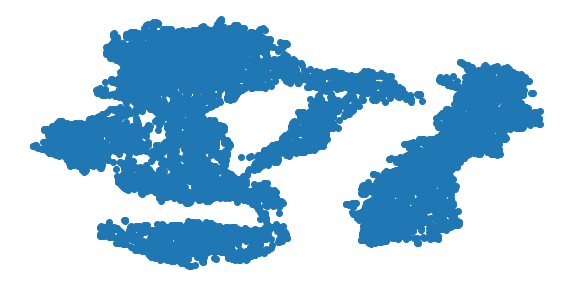

In [10]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

The classes are not quite as separate with the min_dist increased.

In [0]:
#increase neighbors
umap_results = umap.UMAP(n_neighbors=6,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

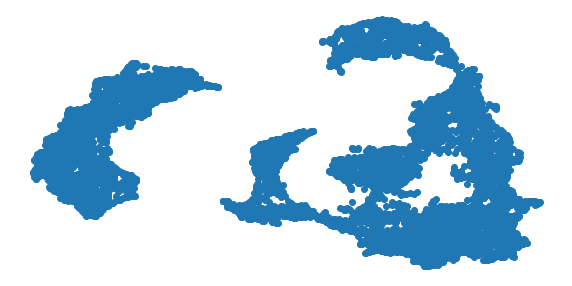

In [12]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [0]:
#increase neighbors and min dist
umap_results = umap.UMAP(n_neighbors=7,
                      min_dist=.3,
                      metric='correlation').fit_transform(X)
      

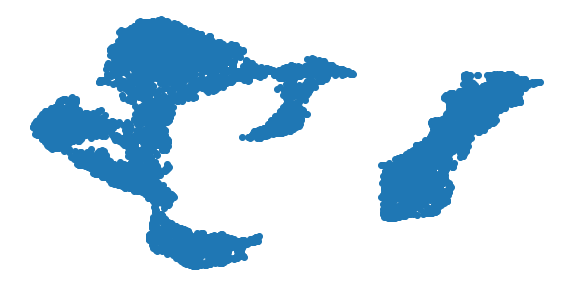

In [18]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

It seems like increasing the number of neighbors and keeping the min_dist low is a good idea. Setting the parameters this way helped me to better distinguish the classes.